<a href="https://colab.research.google.com/github/codestates/ds-section1-sprint1-new/blob/main/n113%20%26%20114%20-%20Data%20Wrangling/n113%20%26%20114%20-%20Data%20Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3 & NOTE 4*

---

# Data Wrangling

## 🏆 학습 목표 
- 체계적인 Data Wrangling 의 과정을 설명할 수 있다.
- 데이터를 탐색해 데이터에 있는 다양한 이슈를 찾아낼 수 있다.
- 코드를 이용해 데이터를 정제할 수 있다.
---

# **💊 Project: 당뇨 데이터 분석**
정제되지 않은 Raw Data 로는, 데이터 분석을 통한 정보를 추출하고 insight를 도출하기 어려울 수 있습니다.  
따라서 Raw Data를 보다 쉽게 접근/분석할 수 있도록 데이터를 정리하고 통합하는 과정인 **`Data Wrangling`**을 시행해야 합니다.

이번 프로젝트를 통해서, 체계적인 **`Data Wrangling`** 과정을 따라가 봅시다.

프로젝트는 아래의 구성으로 이뤄져 있습니다.
- **Part 0. 도입**  
  0-1. 기획 배경  
  0-2. Data Description  
  0-3. 분석 전 고려사항  

- **Part 1. 데이터 수집**  

- **Part 2. 데이터 탐색**  
  2-1. 품질의 문제  
  2-2. 구조적 문제  

- **Part 3. 데이터 정제**  
  3-1. 정제 전 고려사항  
  3-2. 품질의 문제  
  3-3. 구조적 문제

- **Part 4. 결과**  
  4-1. 부작용 검증  
  4-2. 인슐린 복용량 변화 검증  
  4-3. 혈당 수치 변화 검증  
  4-4. 신뢰구간 검증

# **Part 0. 도입**
<img width='500' src='https://i.imgur.com/80I5y2l.png'>

## **0-1. 기획 배경**
- 여러분은 한 병원에서 '당뇨 클리닉' 을 운영하고 있습니다.  
지금까지 사용해온 당뇨 치료제는 `인슐린 주사`의 방법 뿐이었습니다.  
하지만 인슐린 주사는, 환자의 생활에서 여러 불편함과 두려움을 수반하기 마련입니다.
- 이에 여러분은 임상시험 데이터를 분석해 **`경구복용 인슐린제의 효능을 확인`하고, 환자 삶의 질적 개선을 하고자 합니다.**

## **0-2. Data Description**
- 여러분은 ***제 2상 임상 시험(Phase II clinical trial)*** 데이터를 수집했습니다.
  - 제 2상 임상 시험(Phase II clinical trial) ?  
  1-2년동안, 100-300명의 소규모 환자들을 대상으로 약물의 효능을 평가하는 단계  
  <img width='500' src='https://i.imgur.com/nl1Jh4Y.png'> 
- 해당 임상 시험을 통해 수집된 dataset은 총 3개입니다.  
dataset 간에 공통되는 features는 무엇인지 아래의 description을  눈여겨 보도록 합시다.

<br>

#### **`patients` 데이터**  
> - 이름: 환자 이름
- 나이: 환자의 성별과 나이
- 환자식별번호: 시스템에 저장되어 있는 5자리 숫자로 구성된 환자 번호
- 키: 환자의 키
- 몸무게: 환자의 몸무게
- 체질량지수: 환자의 체질량지수
- 전화번호: 환자의 개인 전화번호 
<br>

#### **`insuline test` 데이터** 
> - 이름: 환자 이름
- 경구용_인슐린: 주사제 인슐린의 일일 투여량의 중앙값(median) 에서 24주 뒤의, 경구 인슐린의 일일 투여량 중앙값 <br>
  - `주사제 인슐린의 일일 투여량 중앙값`**u** - `24주 뒤, 경구 인슐린의 일일 투여량의 중앙값`**u**  
  - **u**는 인슐린의 측정 단위 
- 주사제_인슐린: 주사제 인슐린의 일일 투여량의 중앙값에서 24주 뒤의, 주사제 인슐린의 일일 투여량의 중앙값 <br>
  - `주사제 인슐린의 일일 투여량의 중앙값`**u** - `24주 뒤, 주사제 인슐린의 일일 투여량의 중앙값`**u**  
- 혈당수치_시작: 첫번째 주에 환자의 혈당수치 레벨(%)  
- 혈당수치_끝: 24주 동안의 실험 시행 후, 마지막 주 환자의 혈당수치 레벨 (%)
- 혈당수치_변화: 환자의 혈당수치 레벨의 변화 (%) 
  - `혈당수치_시작 - 혈당수치_끝` 
<br>

#### **`side_effects` 데이터** 
> - 이름: 환자 이름
- 부작용: 환자의 의해서 보고된 부작용 

## **0-3. 분석 전 고려사항** 
- **`프로젝트를 실행하기 전에, 어떤 feature를 기준으로 치료제의 효능을 비교하면 좋을지 생각해 봅시다!`**
  - 치료제의 효능은, 주사제와 경구제에 따른 **혈당 수치 변화**를 확인하면 될 것 같습니다.  
  이는 **`혈당수치_변화` feature**를 통해 알아볼 수 있습니다.
    - **혈당수치(Hba1c)란?**  
 혈당수치는, 지난 몇 개월 동안의 평균 혈당 조절 수치를 알려주는 혈액의 특성입니다.  
 혈당수치가 높을수록 당뇨의 위험성이 커지고, 수치가 약 ***0.4***정도 낮아졌다면 성공적이라고 평가합니다.  
따라서 인슐린의 효과를 알아보기 위해서는 **혈당 수치 변화를 눈여겨 봐야** 합니다!    
  <img width='450' src='https://i.imgur.com/Bwk2xht.png'> 

- 해당 임상시험에서는 아래와 같은 순서로 혈당 수치를 측정했습니다.
 - 총 350명의, 인슐린 투약 경험이 없는 당뇨병 환자를 대상으로 시행  
 먼저, 350명 모두에게 `주사제`를 투여하여, 기본 (baseline) 혈당수치 레벨을 측정  
 - 4주 뒤, `175명에게 주사제(대조군)`, `175명에게 경구제(실험군)` 투여
 - 24주 이후, **각 약물에 대한 혈당수치 레벨을 확인**

<br>

- **`그렇다면, 기존에 사용하던 주사제를 경구제로 전환하기 위해서는 어떤 결론을 도출해야 할까요?`**
  - 결론적으로 **경구 인슐린제가 주사제에 비해 *'나쁘지 않다 '* 는 것을 입증**하면 됩니다!
  - 이렇듯 이미 효능이 입증된 약품과 새로 개발된 약품을 비교해,  
  효과가 ‘같거나 그 이상일 경우’를 증명하는 방법을, `비열등성 검정(non-inferiority test)` 이라고 합니다.  
  경구제와 주사제의 효능이 동일함에도, 환자들에게 불편한 주사제를 고집할 이유는 없겠죠?
  - 따라서 **주사제와 경구제의 혈당 수치 변화를 통계적으로 비교하며 결론을 짓도록 합시다.**

  <br>

---

# **Part 1. 데이터 수집**
데이터 랭글링(Data Wrangling)을 통해 raw data를 분석하기 좋은 데이터로 변환하기 위해서는, **먼저 데이터를 불러와야** 합니다!  
 
먼저, raw dataset 3가지를 불러오도록 합시다.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터 업로드
from google.colab import files
files.upload()

Saving side_effects.csv to side_effects.csv


{'side_effects.csv': b'\xec\x9d\xb4\xeb\xa6\x84,\xeb\xb6\x80\xec\x9e\x91\xec\x9a\xa9\r\n\xec\xa0\x95\xec\x8a\xb9\xec\x9a\xb4,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xec\x9d\xb4\xec\x9d\x80\xec\x84\x9c,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xec\xb5\x9c\xec\x8a\xb9\xea\xb7\xbc,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xec\x9e\x84\xec\xb0\xac\xed\x95\x98,\xeb\xaa\xa9\xea\xb5\xac\xeb\xa9\x8d \xec\x84\xb1\xea\xb0\x80\xec\x8b\xac\r\n\xea\xb9\x80\xea\xb2\xac\xec\xa3\xbc,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xed\x99\xa9\xed\x98\x80\xed\x95\x98,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xeb\xb0\x95\xec\xa4\x80\xec\x9a\xa9,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xec\xa1\xb0\xec\xa0\x95\xed\x83\x9c,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xeb\xb0\x95\xec\x98\x81\xec\x9a\xb0,\xeb\x91\x90\xed\x86\xb5\r\n\xec\xa1\xb0\xeb\xb3\xb4\xec\xa0\x80,\xec\xa0\x80\xed\x98\x88\xeb\x8b\xb9\xec\xa6\x9d\r\n\xed\x99\xa9\xec\x9a\

In [ ]:
patients = pd.read_csv('patients_info.csv') # 환자 정보 데이터
insuline_test = pd.read_csv('insuline_test.csv') # 실험 데이터
side_effects = pd.read_csv('side_effects.csv') # 부작용 데이터

# **Part 2. 데이터 탐색**

>⚠️ <br>병원 관계자들이 환자의 정보, 건강 상태 등을 직접 기록하기 때문에, **의료 데이터에는 human errors가 많습니다.**<br>따라서 `데이터가 가지고 있는 문제`를 꼼꼼히 살펴보아야 합니다!

<br>

Part 2 에서는, **데이터 문제를 체계적으로 탐색**해 봅시다.  
데이터 문제는 크게 2개의 Types로 구분됩니다.

  1. **데이터 품질의 문제**　
    - 데이터에서 content issue가 발생하는 경우,  
    중복(duplicate), 결측치(missing), 부정확한 데이터(inaccurate) 등의 content issue가 발생

  2. **데이터 구조의 문제** 
    - 데이터의 structual issues가 발생하는 경우,<br> 
  아래의 3가지 요소를 갖추지 않을 경우, 구조적 문제가 발생<br> 
  ```
    1) 각 변수(variable)는 하나의 열(column)을 구성  
    2) 각 관측치(observation)는 하나의 행(row)을 구성  
    3) 각 유형의 관측 단위가 표를 구성 
    ```
   데이터의 구조적 문제가 해결되지 않으면 차후에 분석, 시각화, 모델링을 진행할 때 속도가 느려질 수 있으니 주의해야 함

    - 아래의 예시를 통해 구조적 문제를 한 번 더 생각해 봅시다.<br>**`Tidy Data`**<br><img width='700' src='https://i.imgur.com/u0hRmLF.png'><br>**`Untidy Data`**<br><img width='700' src='https://i.imgur.com/XqwyRDB.png'>

<br>





## **2-1. 품질의 문제** 
먼저 품질의 문제를 확인해 봅시다.

<br>

Issue를 확인하는 방법은 2가지로 구분됩니다.
-  **시각적 탐색**  
text editor, google sheet 와 같이 프로그램을 활용해, 데이터셋을 관찰
-  **프로그래매틱 탐색**  
`info()` 등과 같은 코드를 사용하여, 전체적인 데이터를 확인






### **a. 시각적 탐색**
데이터 품질의 문제를 **시각적 탐색** 방법으로 확인해 보겠습니다.   
여러분이 편한 프로그램을 활용해, 총 3개의 table을 훑어보면 됩니다.

<Br>

Pandas를 활용해 시각적 탐색을 시행하고자 한다면, 아래 코드를 통해 전체 데이터를 `print` 해봅시다.
```
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
```

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# head 출력으로 상위 5개의 환자 데이터 확인
patients.head(10)

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
0,0,백상주,(male 60.0),9239.0,160.02,86.23,NaN,1006801252
1,1,이주하,(male 79.0),31819.0,175.26,94.98,30.92,010/3552/3743
2,2,김영규,(male 40.0),8467.0,175.26,76.52,24.91,010-6494-8571
3,3,이유하,(female 21.0),27095.0,170.18,82.65,28.54,010-6675-4746
4,4,강궁하,(male 78.0),86303.0,177.80,NaN,32.01,##010-8059-6183
5,5,박지연_,(female 68.0),22114.0,152.40,9.24,25.61,010-5209-1705
6,6,이하미,(female 77.0),84728.0,187.96,116.08,32.86,010-66815123
7,7,정동하,(male 77.0),5037.0,154.94,75.52,31.46,010-4606-1406
8,8,임은라,(female 76.0),64105.0,66.00,86.82,30.89,010-4362-0980
9,9,류지하,(female 62.0),10011.0,167.64,97.48,34.69,010-3995-8127


> **🔎 해설**  

- **환자고유번호** 
  - 환자 고유 번호는 환자 테이블의 **기본키(primary key)**로서 기본키의 역할을 하는 데이터는 단일해야하고 값이 존재하지 않으면 안되는 특징을 가지고 있습니다. 

- **이름**
  - 이름에 여러 오류가 있음을 확인할 수 있습니다. 예를 들어 `환자고유번호 = 5` 번의 환자 이름이 `박지연_` 로 기록되어 있습니다. 

- **나이** 
  - 환자의 성별과 나이라는 서로 다른 두 특징들이 괄호 안에 섞여 있습니다.
  - 환자의 나이 데이터 타입이 `integer`이어야 하지만 `51.0`과 같이 소수점을 가지는 `float` 형태로 확인됩니다.
  - 성별이 `female`, `male` 이라고 영어로 되어있습니다. 이를 영어에 익숙하지 않은 병원 관계자를 위해 한글인 `남`, `녀`로 바꾸도록 합니다. 

- **환자식별번호**  
  - 데이터 타입이 `string`이어야 하지만, `92390.0`과 같이 소수점을 가지는 `float` 형태로 확인됩니다.
    - 환자식별번호가 번호임에도 `string` 타입이어야 하는 이유는, 이는 문자열이 나열되어 있는 것에 숫자가 이용된 것이지 수의 의미는 아니기 때문입니다. 
    - 예를 들어, 환자식별변호 99875와 73297이 있을 때, 99875가 73297보다 크다는 것을 의미하지 않습니다. 
    - 그러므로 환자식별번호로 수학적 계산을 하는 것은 타당하지 않습니다.   
  - 5개의 문자로 구성되어 있어야 합니다. 따라서 `7095`는 **`07095`**가 올바른 표현입니다.  
    - 이러한 문제는 software의 변화에 의해 이루어집니다.  
예를 들어 데이터가 처음 google sheet(excel)로 열린다면, 확자 식별 번호는 숫자로 읽혀져 `07095`는 `7095`로 잘못 저장되는 것입니다.

- **키**  
  - 임상시험에서는 두 그룹으로 나눈 환자들의 평균 키, 몸무게 등을 지표로 활용합니다.  
  따라서 정확한 분석을 위해, 데이터에 오류가 없는지 반드시 확인해야 합니다!    
  - `patient_id = 12`인 임지연님의 키가 `77.8`이라고 되어있습니다만, 성인의 키로 이해하기 어려운 데이터입니다. 데이터의 오류를 파악하기 위해, 지연님의 `몸무게`, `체질량지수` 데이터를 이용해 확인해 봅시다. 
  
  - 몸무게, 키, 체질량지수의 수학적 관계는 아래와 같습니다. 
  ```
  체질량지수 = (몸무게 (kg) / (키 (cm) x 키 (cm))) x 10,000
  ```
  이를 통해 임지연님의 키를 아래와 같이 유추할 수 있습니다.

      ```
      임지연님의 몸무게 = 84.32
      임지연님의 체질량지수 = 26.67 
      임지연님의 키 = 177.8
      ```
      `몸무게`, `체질량지수` 데이터를 활용해, 임지연님의 키는 `77.8` 아닌 **`177.8`**임을 확인할 수 있습니다. 앞의 1이 빠짐으로써 생긴 오류임을 확인할 수 있습니다. 

- **몸무게**
  - 존재하지 않는 데이터가 `NaN`이 있음을 알 수 있습니다. 
  - `patient_id = 5`인 박지연님의 몸무게가 `9.47`로 성인의 몸무게로 가능하지 않은 값입니다. 박지연님의 몸무게 또한 `체질량지수`와 `몸무게`를 이용하여 그 값을 확인해보도록 합니다. 
  ```
  박지연님의 키 = 152.40
  박지연님의 체질량지수 = 25.61
  박지연님의 몸무게 = 59.24
  ```
  박지연님의 몸무게 데이터 또한 `59.24`에서 앞의 숫자 5가 빠져 `9.24`가 되었음을 확인할 수 있습니다. 이렇게 healthcare data는 human error가 많기 때문에 세세히 살펴볼 필요가 있습니다. 

- **체질량지수**
  - 존재하지 않는 데이터 `NaN`이 있음을 알 수 있습니다. 
  
- **전화번호**
  - 전화번호는 `010 - xxxx - xxxx`의 형태로 구성되어야 합니다. 하지만 `010`과 `-` 이 빠져있는 경우가 많습니다.
  - 숫자와 `-` 외에 **`#`**, **`,`**, **`/`**, **`\`** 등의 문자열이 포함되어 있습니다. 




In [ ]:
# head 출력으로 상위 5개의 실험 데이터 확인
insuline_test.head()

,이름,경구용_인슐린,주사제_인슐린,혈당수치_시작,혈당수치_끝,혈당수치_변화
0,권지경,41u - 48u,-,7.63,7.20,NaN
1,정승운,-,40u - 45u,7.56,7.09,0.97
2,김미수,-,39u - 36u,7.68,7.25,NaN
3,김혀석,33u - 36u,-,7.97,7.62,0.35
4,강서윤,-,33u - 29u,7.78,7.46,0.32


> **🔎 해설**  
- **경구용 인슐린, 주사제 인슐린**
  - **u**라는 인슐린 측정 단위로 인해, Pandas가 데이터 타입을 **object로 인식**하게 됩니다.  
  다시말해, Pandas가 해당 데이터를 float나 integer로 인식할 수 없습니다.
  - **Missing values**가 `-`의 형태로 존재함을 알 수 있습니다.
- **혈당수치_변화**
  - `혈당수치_시작`과 `혈당수치_끝` 값이 존재함에도, **NaN과 missing values가 존재**합니다.


In [ ]:
# head 출력으로 상위 5개의 부작용 데이터 확인
side_effects.head()

,이름,부작용
0,정승운,저혈당증
1,이은서,저혈당증
2,최승근,저혈당증
3,임찬하,목구멍 성가심
4,김견주,저혈당증


> **💡 Tip**  
- 시각적 탐색을 통해서 데이터 타입을 확인하는 것은 시간/비용적으로 비효율적인 것 같습니다. 
- 그렇다면 **시각적 탐색은 어떤 점에서 좋을까요?**  
  - 프로그래매틱 탐색을 통해 알기 어려운, **데이터의 세세한 면을 확인**할 수 있습니다.
  - 의료 데이터에서는 작은 data issues가 이후 분석에 큰 영향을 미치니, 꼼꼼히 확인할 필요가 있습니다.




### **b. 프로그래매틱 탐색**
지금까지 우리는 데이터 품질의 문제를 시각적 탐색을 통해 살펴보았습니다.  
또 다른 방법인 ***프로그래매틱 탐색***을 활용해, 계속해서 품질의 문제를 확인해 봅시다.  

프로그래매틱 탐색은 functions와 methods를 이용하여 데이터를 확인하는 방법입니다.  
아래는 Pandas에서 가장 빈번하게 사용되는 methods 입니다. 

> `.head()` : [공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)  
  `.tail()` : [공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)  
  `.sample()` : [공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)  
  `.info()` : [공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)  
  `.describe()` : [공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)  
  `.value_counts()` : series only [공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)  
  `.loc()` , `.iloc()` : 데이터 인덱싱 및 선택 방법 [loc 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)    [iloc 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) 

<br>

이 중, 몇 가지 방법을 활용하여 함께 프로그래매틱 탐색을 진행해 봅시다.



**b-1. `info()`**  
`info()` 함수를 통해서,  
데이터를 구성하는 행과 열의 크기, 컬럼명, data type 등을 확인할 수 있습니다.

In [ ]:
# 환자 데이터 확인
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   환자고유번호  509 non-null    int64  
 1   이름      509 non-null    object 
 2   나이      509 non-null    object 
 3   환자식별번호  497 non-null    float64
 4   키       503 non-null    float64
 5   몸무게     505 non-null    float64
 6   체질량지수   505 non-null    float64
 7   전화번호    509 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 31.9+ KB


> **🔎 해설**  
- **나이** 
  - 나이 데이터에는 나이와 성별이라는 두가지 features가 있어 현재 데이터 타입이 `object`이지만, 나이는 `integer`이어야 합니다.
- **환자식별번호**
    - 환자식별호는 숫자로 구성되어 있어 데이터 타입이 `integer`이어야 할 것 같지만, 사실상 환자식별번호는 **문자열**이기에 이 데이터는 `float`가 아닌 `string`을 나타내는 `object` 이어야 합니다.   
    - 데이터에 missing values가 있음을 확인할 수 있습니다. 
- **키, 몸무게, 체질량지수**
  - 이 세 피쳐들의 데이터 타입은 `float`로 옳은 데이터 타입입니다. 하지만 모두 missing values가 있음을 확인 할 수 있습니다. 
  - Missing values을 아래의 `isnull()` methods를 통해 추가적으로 확인 할 수 있습니다. 



In [ ]:
# 환자 데이터 중 키, 몸무게, 체질량지수 컬럼의 결측값 확인
patients[patients['키'].isnull() | patients['몸무게'].isnull() | patients['체질량지수'].isnull()]

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
0,0,백상주,(male 60.0),9239.0,160.02,86.23,NaN,1006801252
4,4,강궁하,(male 78.0),86303.0,177.80,NaN,32.01,##010-8059-6183
13,13,배종하,(male 74.0),35203.0,NaN,69.35,27.08,010-5972-5744
20,20,정성윤,(male 35.0),2382.0,162.56,NaN,35.38,010-7952-4468
45,45,오세소,(male 52.0),38310.0,NaN,80.74,27.88,010-3682-0658
103,103,고호연,(male 56.0),32751.0,NaN,87.23,30.12,010-4994-8130
345,345,박채연,(female 18.0),47957.0,NaN,84.01,29.01,010-5452-4388
353,353,김지하,(female 72.0),31022.0,170.18,56.29,NaN,010-5524-8928
366,366,김동면,(male 42.0),57401.0,170.18,NaN,17.09,010-6329-8216
384,384,한하수,(female 32.0),57730.0,NaN,70.94,25.24,010?3837?1417


> **🔎 해설**  
- 확인 결과 **missing values**가 세 요소들 중 하나씩 존재함을 알 수 있습니다. 그러기에 이 missing values은 `키, 몸무게, 체질량지수`의 수학적 관계를 이용하여 해결 할 수 있습니다. 

In [ ]:
# 실험 데이터 확인
insuline_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   이름       350 non-null    object 
 1   경구용_인슐린  350 non-null    object 
 2   주사제_인슐린  350 non-null    object 
 3   혈당수치_시작  350 non-null    float64
 4   혈당수치_끝   350 non-null    float64
 5   혈당수치_변화  213 non-null    float64
dtypes: float64(3), object(3)
memory usage: 16.5+ KB


> **🔎 해설**  
- **경구용 인슐린, 주사제 인슐린**
  - 이 두 피쳐들의 데이터 타입은 모두 `integer` 이여야 합니다. 하지만 `시작_복용량 - 마지막_복용량`의 형태로 인해, `object`로 인식되어 졌습니다. 
  - 앞서 시각적 탐색을 통해, `경구용 인슐린, 주사제 인슐린` columns에서 많은 **missing values**을 확인했습니다. 하지만 missing values가 `-` 로 되어 있기 때문에, 프로그래매틱 탐색에서는 **missing values가 *없다*** 고 나옵니다!  
    - missing value가 `null`로 되어있지 않고 `/, -, NaN, None`으로 되어있는 경우는 흔하므로 주의해야 합니다! 따라서 `-` 값들을 **null 값으로 전환**해야 합니다.
- **혈당수치_변화**
  - **혈당수치_변화는 치료제의 효과를 결정하는 *key metric*** 입니다!  
  그런데 `info()` 메서드를 통해 확인해보니, **misssing values**가 존재함을 알 수 있습니다. 아래의 `isnull()` 메서드를 이용해 missing values을 확인해 봅니다.


In [ ]:
insuline_test[insuline_test.혈당수치_변화.isnull()]

> **🔎 해설**  
- 다행히도 혈당수치_변화의 misssing values은 `혈당수치_시작`과 `혈당수치_끝`의 데이터는 모두 존재합니다. **혈당수치_변화**는 **혈당수치_끝 - 혈당수치_시작** 이기에 이 missing values 또한 계산을 통해 얻을 수 있습니다. 

In [ ]:
# 부작용 데이터 확인
side_effects.info() # 결측데이터 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      35 non-null     object
 1   부작용     35 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


**b-2. `describe()`**  
`describe()`는 **numerical data types**의 **descriptive states**(평균, 표준편차, 최소, 최대값 등)를 보여주는 메서드 입니다. 

In [ ]:
# 환자 데이터의 descriptive states 확인
patients.describe()

,환자고유번호,환자식별번호,키,몸무게,체질량지수
count,509.00000,497.000000,503.000000,505.000000,505.000000
mean,254.00000,48682.774648,168.360040,78.791881,28.167802
std,147.07991,30278.592427,14.180208,16.554032,10.650699
min,0.00000,1002.000000,66.000000,9.240000,8.650000
25%,127.00000,21222.000000,160.020000,67.860000,23.360000
50%,254.00000,47362.000000,170.180000,79.020000,27.210000
75%,381.00000,75247.000000,177.800000,90.490000,31.760000
max,508.00000,99701.000000,200.660000,194.290000,185.470000


In [ ]:
# 실험 데이터의 descriptive states 확인
insuline_test.describe()

,혈당수치_시작,혈당수치_끝,혈당수치_변화
count,350.000000,350.000000,213.000000
mean,7.956343,7.560057,0.540657
std,0.545328,0.545456,0.277417
min,7.500000,7.010000,0.200000
25%,7.650000,7.270000,0.340000
50%,7.785000,7.400000,0.380000
75%,7.950000,7.557500,0.920000
max,9.950000,9.580000,0.990000


In [ ]:
insuline_test.head(10)

,이름,경구용_인슐린,주사제_인슐린,혈당수치_시작,혈당수치_끝,혈당수치_변화
0,권지경,41u - 48u,-,7.63,7.20,NaN
1,정승운,-,40u - 45u,7.56,7.09,0.97
2,김미수,-,39u - 36u,7.68,7.25,NaN
3,김혀석,33u - 36u,-,7.97,7.62,0.35
4,강서윤,-,33u - 29u,7.78,7.46,0.32
5,이은서,-,42u - 44u,7.56,7.18,0.38
6,김지연,37u - 42u,-,7.65,7.27,0.38
7,윤초영,31u - 38u,-,7.89,7.55,0.34
8,김찬철,-,54u - 54u,8.08,7.70,NaN
9,강서연,30u - 36u,-,7.76,7.37,NaN


> **🔎 해설**  
- **`혈당수치_변화`** 컬럼을 눈여겨 봅시다.  
25% 값과 50% 값의 차이가 `0.04`임에 비해, 75% 값 = `0.92`인 것을 보아, 과한 **skewness**가 있음을 알 수 있습니다!  
이를  앞서 *`2-1-a.`* 에서 진행한 시각적 탐색의 insuline_test table을, 아래에서 함께 확인해 봅시다.  
  2번째 row, 정승운님의 혈당수치_변화가 **`0.47`**이어야 하는데 **`0.97`** 로 잘못 계산되어 있습니다.
 <img width='500' src='https://i.imgur.com/Vh3tASL.png'>  
 <br>
 이런 잘못된 데이터가 데이터의 큰 skewness를 초래한 것으로 유추해 볼 수 있습니다. 



**b-3. `sample()`**  
`sample()`은 **랜덤으로 데이터를 추출**하여 보여주는 메서드 입니다. 

In [ ]:
# 5개의 환자 데이터를 랜덤으로 추출하여 확인
patients.sample(5)

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
78,78,이유연,(female 66.0),2048.0,160.02,69.54,27.16,5605-4490
296,296,한성지,(male 71.0),NaN,175.26,71.94,23.42,010-6646-8416
151,151,김지솔,(female 49.0),95610.0,149.86,72.53,32.30,##010-0425-7939
6,6,이하미,(female 77.0),84728.0,187.96,116.08,32.86,010-66815123
10,10,정승하,(male 64.0),49780.0,182.88,81.65,24.41,9190-7516


> **🔎 해설**  
- 데이터를 **부분적**으로 꺼내보는 방법은 데이터를 큰 테이블에 한번에 볼 때보다 데이터를 눈에 편하게, 그리고 **세세하게** 볼 수 있는 효과를 줍니다. 
- 이를 통해 `환자고유번호`가 `297`인 `손지저님`의 체질량지수가 **122.37**로, 손지저님의 키와 몸무게를 고려했을 때 가능하지 않은 수치가 나온 것을 확인할 수 있었습니다. 이렇게 `키, 몸무게, 체질량지수`의 값을 다시 정확하게 하는 것은 중요해 보입니다. 

**b-4. `duplicated()`**  

`duplicated()`는 중복된 데이터를 확인할 수 있는 함수입니다. 

In [ ]:
# 환자 데이터 중 중복된 데이터 확인
patients[patients.duplicated()]

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호


> **🔎 해설**  
- `duplicated()`를 통해 중복된 데이터의 존재를 확인한 결과, 중복된 데이터가 없다고 나옵니다. **하지만!** 우리는 데이터에 많은 **오류**가 존재함을 확인했고, 이 오류 사항들에 의해 중복된 데이터임에도 다른 데이터라고 인식되는 경우가 존재합니다. 
- 그러기에 데이터에 이러한 오류를 제거하는 **`cleaning`** 과정을 거친 뒤, 다시 한번 중복된 데이터가 있는지 확인해야 함을 잊지 말아야 합니다.   


**b-5. `sort_values()`**  

`sort_values()`는 값을 기준으로 정렬하는 메소드입니다.  
default로는 오름차순 정렬을 시행합니다.

In [ ]:
# 환자 데이터 중, 몸무게 컬럼을 기준으로 오름차순 정렬
patients.몸무게.sort_values()

5        9.24
418     22.14
231     46.31
453     46.58
349     46.81
        ...  
50     194.29
4         NaN
20        NaN
366       NaN
505       NaN
Name: 몸무게, Length: 509, dtype: float64

> **💡 Tip**  
`최소몸무게값 =  9.24kg`로 확인되는 데이터는, 성인의 무게로 보기에 불가능한 수로써 우리는 위에서 `59.24kg` 이었음을 확인했습니다. 하지만 몸무게가 `22.14kg`인 부분은 확인하지 못했었고, 이 또한 확인할 필요가 있어 보이기에 아래에서 확인해 보았습니다. 그리고 이는 데이터 오류가 아님을 확인할 수 있습니다. 


In [ ]:
patients[patients.몸무게 == 22.14]

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
418,418,이준하,(male 39.0),58571.0,160.02,22.14,8.65,1089363622


In [ ]:
# 환자의 데이터중, 키 컬럼을 기준으로 오름차순 정렬
patients.키.sort_values()

8      66.00
355    68.58
161    70.18
110    72.00
12     77.80
       ...  
45       NaN
103      NaN
345      NaN
384      NaN
458      NaN
Name: 키, Length: 509, dtype: float64

> **💡 Tip**  
키 컬럼으로 오름차순으로 정렬한 결과, 성인의 키가 **100cm 이하**인 성인의 데이터가 존재함을 알 수 있습니다. 이 값들도 데이터 오류인지 확인해보도록 하겠습니다. 

In [ ]:
# 키가 100cm 이하인 환자의 데이터를 확인
less_100 = patients[patients.키 < 100]
less_100

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
8,8,임은라,(female 76.0),64105.0,66.00,86.82,30.89,010-4362-0980
12,12,임지연,(female 61.0),24504.0,77.80,84.32,26.67,010-7778-9279
110,110,유왕석,(male 61.0),75247.0,72.00,102.60,30.68,010-0084-0731
161,161,고은미,(female 25.0),59522.0,70.18,82.01,28.32,010-8733-9913
355,355,정태석,(male 24.0),2905.0,68.58,87.23,185.47,010-4700-5204


> **💡 Tip** 
- `몸무게와 체질량지수`를 고려하여 `키` 데이터를 확인한 결과 키 데이터는 **오류**임을 확인할 수 있습니다. **체질량지수와 몸무게 데이터**를 사용하여 정확한 키 값을 아래에서 확인해보도록 하겠습니다.
- 아래의 코드로 확인 결과, `정태석님`의 데이터를 제외하고는 키 데이터가 **오류**임을 확인할 수 있습니다. `정태석님`의 키, 몸무게, 체질량지수 `68.58, 87.23, 185.47`은 일반적인 성인의 체격은 아니지만 다양한 체격이 존재함을 고려해 옳은 데이터로 간주합니다.  

In [ ]:
# 몸무게와 체질량지수를 이용해 키를 계산
import math
(10000*(less_100.몸무게/less_100.체질량지수))**(1/2)

8      167.648988
12     177.809021
110    182.871490
161    170.171482
355     68.579782
dtype: float64

In [ ]:
# 환자의 데이터 중, 체질량지수 컬럼을 기준으로 오름차순 정렬
patients.체질량지수.sort_values()

418      8.65
366     17.09
401     17.51
41      17.54
139     17.71
        ...  
355    185.47
0         NaN
353       NaN
396       NaN
416       NaN
Name: 체질량지수, Length: 509, dtype: float64

In [ ]:
# 체질량지수가 10 이하 또는 100 이상인 데이터를 확인
less10_over100 = patients[(patients.체질량지수 < 10) | (patients.체질량지수 > 100)]
less10_over100

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
155,155,조정태,(male 72.0),62201.0,160.02,62.46,124.39,010-0266-6045
297,297,손지저,(female 27.0),15205.0,157.48,55.47,122.37,010-9742-6091
355,355,정태석,(male 24.0),2905.0,68.58,87.23,185.47,010-4700-5204
418,418,이준하,(male 39.0),58571.0,160.02,22.14,8.65,1089363622


> **💡 Tip** 
- 환자의 `키, 몸무게`를 이용하여 옳은 `체질량지수`를 아래에서  확인해 보도록 합니다. 그 결과 `조정태님`과 `손지저님`의 **체질량지수**는 앞에 **1자**가 잘못 입력되었음을 확인할 수 있었습니다. 그리고 `정태석님`과 `이준하님`의 체질량지수는 옳은 데이터임을 확인할 수 있었습니다. 

In [ ]:
(less10_over100.몸무게 / (less10_over100.키 * less10_over100.키))*10000

155     24.392339
297     22.366980
355    185.468821
418      8.646276
dtype: float64

## **2-2. 구조적 문제** 

지금까지 우리는 데이터 품질의 문제를 확인하기 위해, 시각적 그리고 프로그매틱 탐색을 시행해 보았습니다.

다음으로는 **`데이터의 구조적 문제`**를 살펴봅시다.  
앞서 언급한 *Tidy data의 3가지 조건* 을 고려하며, 이번에도 동일하게 **시각적 그리고 프로그매틱 탐색**을 시행해 봅시다.
> **1)** 각 변수(variable)는 하나의 열(column)을 구성  
  **2)** 각 관측치(observation)는 하나의 행(row)을 구성      
  **3)** 각 유형의 관측 단위가 표를 구성

### **a. 시각적 탐색**

In [ ]:
# head 출력으로 상위 5개의 환자 데이터 확인
patients.head()

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
0,0,백상주,(male 60.0),9239.0,160.02,86.23,NaN,1006801252
1,1,이주하,(male 79.0),31819.0,175.26,94.98,30.92,010/3552/3743
2,2,김영규,(male 40.0),8467.0,175.26,76.52,24.91,010-6494-8571
3,3,이유하,(female 21.0),27095.0,170.18,82.65,28.54,010-6675-4746
4,4,강궁하,(male 78.0),86303.0,177.80,NaN,32.01,##010-8059-6183


> **🔎 해설**  
- **나이** 
  - 하나의 열에 `성별`과 `나이`라는, **2개의 variables가 함께 들어** 있습니다.  
  각 변수(variable)는 하나의 열(column)을 구성해야 하므로, **2개의 columns으로 분리**해야 합니다.
 

In [ ]:

# head 출력으로 상위 5개의 치료제 데이터 확인
insuline_test.head()

,이름,경구용_인슐린,주사제_인슐린,혈당수치_시작,혈당수치_끝,혈당수치_변화
0,권지경,41u - 48u,-,7.63,7.20,NaN
1,정승운,-,40u - 45u,7.56,7.09,0.97
2,김미수,-,39u - 36u,7.68,7.25,NaN
3,김혀석,33u - 36u,-,7.97,7.62,0.35
4,강서윤,-,33u - 29u,7.78,7.46,0.32


> **🔎 해설**  
-  **경구용 인슐린, 주사제 인슐린** 
  - 하나의 column 안에 `시작 복용량`과 `마지막 복용량`이라는, **2개의 variables가 함께 들어** 있습니다.   
  각 변수(variable)는 하나의 열(column)을 구성해야 하므로, **2개의 column으로 분리**해야 합니다.
  - 또한 각 관측치(observation)는 하나의 행(row)을 구성해야 하므로, **`인슐린 종류`** column을 생성하여 value를 넣어야 합니다.
  <br>
  >   
  - 위의 두 가지 조건을 고려하여 데이터를 수정하면, 아래의 그림과 같이 입력되어야 합니다.   
  이는 `melt()`와 `split()` fuction을 이용하도록 합시다. <br> 
<img width='400' src='https://i.imgur.com/dB800lC.png'> 


### **b. 프로그래매틱 탐색**

각 table의 `info()`를 출력해 column들의 이름을 확인하면서, **각 column이 어느 table과 연관되어 있는지** 생각해 봅시다.

In [ ]:
# 환자 데이터 확인
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   환자고유번호  509 non-null    int64  
 1   이름      509 non-null    object 
 2   나이      509 non-null    object 
 3   환자식별번호  497 non-null    float64
 4   키       503 non-null    float64
 5   몸무게     505 non-null    float64
 6   체질량지수   505 non-null    float64
 7   전화번호    509 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 31.9+ KB


In [ ]:
# 실험 데이터 확인
insuline_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   이름       350 non-null    object 
 1   경구용_인슐린  350 non-null    object 
 2   주사제_인슐린  350 non-null    object 
 3   혈당수치_시작  350 non-null    float64
 4   혈당수치_끝   350 non-null    float64
 5   혈당수치_변화  213 non-null    float64
dtypes: float64(3), object(3)
memory usage: 16.5+ KB


In [ ]:
# 부작용 데이터 확인
side_effects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      35 non-null     object
 1   부작용     35 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


> **🔎 해설**
- 우리가 수집한 임상실험 dataset은 총 3개의 table로 분리되어 있습니다.  
하지만 3개의 table을 모두 사용하여 분석을 진행하는 것은 비효율적으로 보입니다.  
- 그렇다면 **효율적이면서도 tidy data의 성립요건을 충족하기 위해서는, 총 몇개의 table이 필요할까요?**  
정답은 **총 2개**, **`patients`** 와 **`insulin_test`** table만 있으면 됩니다!
  - 그렇다면 **`side_effects`** table은 어떻게 될까요?
    - side_effects 테이블의 `부작용` 컬럼은 insuline_test에 대한 부작용이므로, **`insuline_test`**테이블에 포함이 되어야 할 것 같습니다.
    - 또한 `이름` 컬럼은 **`patients`** 와 **`insuline_test`** 에 중복되는 데이터이기에 insuline_test 테이블에 `이름` 컬럼은 삭제해 줍니다.   
  <br>  
- 결론적으로 데이터를 정리하고 나면,  
아래의 그림처럼 **`patients`** 와 **`insuline_test`** table 로 정리할 수 있을 것입니다! 
  - 여기서 중요한 점은, table 2개를 연결하는 column이 `환자고유번호`라는 것입니다. 
  - **환자고유번호**는 이름 처럼 **중복되거나, 변하지 않습니다.**  
  이 때문에 **환자고유번호**를 테이블들 간의 **primary key**로 이용하는 것이 좋습니다.
  - 그럼 `이름`은 1개의 table에만 포함되니, 변화가 생긴다면 하나의 table만 업데이트하면 됩니다.
<img width='2000' src='https://i.imgur.com/px0Fj0f.png'> 


In [ ]:
# duplicate column name 확인
all_columns = pd.Series(list(patients) + list(insuline_test) + list(side_effects))
all_columns[all_columns.duplicated()]

8     이름
14    이름
dtype: object

## **2-3. Summary**
지금까지 찾은 데이터 이슈들에 대해서 정리해 봅시다!

<br>

### **데이터 품질의 문제**
- **`patients table`**
> - 환자 이름에 error 존재
  - 나이 컬럼에 성별과 나이가 존재 
  - 나이의 데이터 타입이 float로 되어 있음
  - 성별의 데이터 타입은 category 이어야 함
  - 환자식별번호의 데이터 타입이 float로 되어 있음
  - 전화번호에 error가 존재, 포맷이 일정하지 않음
  - 키, 몸무게, 체질량지수에 missing values가 존재
  - 키, 몸무게, 체질량지수에 부정확한 데이터가 존재

- **`insuline_test table`**
> - 혈당수치_변화에 missing values가 존재
  - 혈당수치_변화가 잘못 계산되어 있음
  - 경구용_인슐린, 주사제_인슐린에 u가 존재 
  - 경구용_인슐린, 주사제_인슐린의 데이터 타입이 string임 
  - 경구용_인슐린, 주사제_인슐린에 missing values가 존재

- **`side effects table`**
  > - 없음

<br>

### **데이터 구조의 문제**
> - `patients` 테이블의 나이 컬럼에 나이와 성별 두 개의 요소가 존재
- `insuline_test`테이블의 경구용_인슐린과 주사제_인슐린에 시작_복용량과 마지막_복용량 이라는 두 개의 요소가 존재
- side_effects 테이블은 insuline_test 테이블에 포함되어 있어야함
- patients 테이블과 isuline_test 테이블에 이름 컬럼이 중복해서 들어가 있음 


# **Part 3. 데이터 정제**

우리는 Part 2 를 통해, 이슈별로(품질의 문제, 구조적 문제) 어떤 데이터를 어떻게 정제해야 하는지 정리해 보았습니다.  
하지만 아직은 정제되지 않은 raw data입니다.  

Part 3 에서는, 데이터를 분석하기 용이하도록 **데이터를 정제하는 단계**를 시행하도록 합시다.

정제 단계는 아래의 **3단계**를 걸쳐 진행됩니다.  
탐색 단계에서 발견된 데이터의 문제점을, 
- 문제정의 : 어떻게 정제할지 정의하고
- 코드구현 : 정제하기 위한 코드를 짜고
- 결과확인 : 잘 정제가 되었는지 테스트를 해보는 것입니다.

<br>

> ⚠️ **정제할 때 주의할 점**
- 데이터 정제 과정이 중복적으로 이뤄져야 한다면, 절대 하나하나씩 일일이 수정해서는 안됩니다! <br>***데이터 정제는, code를 이용하여 자동적으로*** 진행되어야 합니다.

### **3-1. 정제 단계 전 고려사항**

⚠️ **정제 단계 시행 전, 원본 DataFrame을 유지하기 위하여 반드시 `copy()`를 시행해야 합니다!**  
많은 정제 과정를 거치더라도, 추후에 original data를 확인하기 위함입니다.


이후의 정제 과정는 copy된 데이터에 작업되도록 합시다.


```
df_clean = df.copy()
```

In [ ]:
# 원본 DataFrame copy 시행
patients_clean = patients.copy()
insuline_test_clean = insuline_test.copy()
side_effects_clean = side_effects.copy()

### **3-2. 품질의 문제**
데이터 정제 과정은, 순서를 고려하여 정제하는 것이 중요합니다. 

먼저 **품질의 문제를 해결**하고 **Missing values**를 채워줍니다. 그리고 **Duplicates**를 해결하고 마지막으로 **구조적 문제를 해결**하는 순서로 진행됩니다.  

만일 품질의 문제를 해결 하지 않은 채로 구조적 문제를 해결 한다면, 테이블들을 merge 하는 과정해서 정확하게 테이블들이 연결되지 않습니다. 또한 missing values를 해결하지 않고 duplicates를 삭제한다면 보존되어야 하는 데이터가 삭제되는 경우가 생길 수 있습니다.

따라서 **데이터 품질의 문제**를 먼저 정제하도록 합시다.

#### **a. `patients`**

**a-1-1. 문제정의** 

`이름`에 글자열이 아닌 `_ ! . 3` 와 같은 부호들과 숫자들이 포함되어 있습니다. 

**a-1-2. 코드구현**

In [ ]:
import re

def has_errors(inputString):
  return bool(re.search('[_,!,.,\d+]', inputString))

In [ ]:
# 이름에 섞여 있는 오류 데이터를 확인
error_condition = patients_clean.이름.apply(has_errors)
error_names = patients_clean[error_condition]
error_names

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
5,5,박지연_,(female 68.0),22114.0,152.40,9.24,25.61,010-5209-1705
83,83,!이경도,(male 36.0),45407.0,170.18,69.26,23.91,010-1164-9855
99,99,박정.하,(male 73.0),11590.0,167.64,77.52,27.58,0106460-2153
131,131,정용하3,(male 62.0),25962.0,175.26,107.87,35.12,010-6340-8381
139,139,1염하하,(female 58.0),45202.0,170.18,51.30,17.71,010-7795-1186
147,147,장재운!,(male 47.0),90025.0,170.18,51.76,17.87,010-9357-0487
154,154,이균삭.,(male 54.0),53711.0,154.94,74.84,31.18,010-6806-5598
169,169,이준!하,(male 44.0),19020.0,167.64,83.24,29.62,010-1868-6239
189,189,김지_원,(female 45.0),95817.0,170.18,53.89,18.61,010-6909-5148
246,246,민지련_,(male 41.0),92704.0,177.80,76.66,24.25,010-0443-1151


In [ ]:
# 코드가 정확하게 오류들을 제거하는지 확인 
error_names.이름 = error_names.이름.str.replace('[_,!,.,\d+]', '')
error_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
5,5,박지연,(female 68.0),22114.0,152.40,9.24,25.61,010-5209-1705
83,83,이경도,(male 36.0),45407.0,170.18,69.26,23.91,010-1164-9855
99,99,박정하,(male 73.0),11590.0,167.64,77.52,27.58,0106460-2153
131,131,정용하,(male 62.0),25962.0,175.26,107.87,35.12,010-6340-8381
139,139,염하하,(female 58.0),45202.0,170.18,51.30,17.71,010-7795-1186
147,147,장재운,(male 47.0),90025.0,170.18,51.76,17.87,010-9357-0487
154,154,이균삭,(male 54.0),53711.0,154.94,74.84,31.18,010-6806-5598
169,169,이준하,(male 44.0),19020.0,167.64,83.24,29.62,010-1868-6239
189,189,김지원,(female 45.0),95817.0,170.18,53.89,18.61,010-6909-5148
246,246,민지련,(male 41.0),92704.0,177.80,76.66,24.25,010-0443-1151


In [ ]:
# 제거됨을 확인하고 환자데이터 이름 컬럼에 적용
patients_clean.이름 = patients_clean.이름.str.replace('[_,!,.,\d+]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


**a-1-3. 결과확인**

In [ ]:
# 아래와 같이 불필요한 문자열이 제거됨을 확인
patients_clean[error_condition] 

,환자고유번호,이름,나이,환자식별번호,키,몸무게,체질량지수,전화번호
5,5,박지연,(female 68.0),22114.0,152.40,9.24,25.61,010-5209-1705
83,83,이경도,(male 36.0),45407.0,170.18,69.26,23.91,010-1164-9855
99,99,박정하,(male 73.0),11590.0,167.64,77.52,27.58,0106460-2153
131,131,정용하,(male 62.0),25962.0,175.26,107.87,35.12,010-6340-8381
139,139,염하하,(female 58.0),45202.0,170.18,51.30,17.71,010-7795-1186
147,147,장재운,(male 47.0),90025.0,170.18,51.76,17.87,010-9357-0487
154,154,이균삭,(male 54.0),53711.0,154.94,74.84,31.18,010-6806-5598
169,169,이준하,(male 44.0),19020.0,167.64,83.24,29.62,010-1868-6239
189,189,김지원,(female 45.0),95817.0,170.18,53.89,18.61,010-6909-5148
246,246,민지련,(male 41.0),92704.0,177.80,76.66,24.25,010-0443-1151


**a-2-1. 문제정의** 

- `나이`컬럼에는 성별과 나이, **2개의 요소가 함께** 들어 있습니다. 따라서 각각 분리하여 **새로운 columns에 저장**하도록 합시다. </br>
- 나이는 **integer** 데이터 타입으로, 성별은 **object** 데이터 타입으로 변환해 줍니다.
- 성별이 **영어**인 `female, male`로 되어 있는데 영어에 익숙하지 않을 수도 있는 병원 관계자분들을 위해 **한글**인 `여, 남`으로 바꿔줍니다. 


성별과 나이 정보를 `나이` 컬럼에서 추출하기 위하여,  
`정규 표현식(regrular expression)`과 Pandas의 `str.extract`을 이용하려 합니다.
- [정규 표현식 공식 문서](https://docs.python.org/3/library/re.html)  
[정규 표현식 참고 링크](https://wikidocs.net/4308)  
- [`str.extract()` 공식 문서](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html)


**a-2-2. 코드구현**

In [ ]:
# 환자나이 컬럼 생성 후 데이터 타입을 integer로 변경
patients_clean['환자나이'] = patients_clean.나이.str.extract('(\d+)').astype('int')

# 성별 컬럼 생성 
patients_clean['성별'] = patients_clean.나이.str.replace(r'[^a-zA-Z]', '', regex=True)

# 기존 나이 컬럼 제거
patients_clean = patients_clean.drop('나이', axis=1)

# 영어를 한글로 변환한 뒤, 성별을 category 데이터 타입으로 변화
patients_clean.성별 = patients_clean.성별.replace({'male':'남', 'female':'여'})
patients_clean.성별 = patients_clean.성별.astype('category')

**a-2-3.결과확인**

In [ ]:
patients_clean.head()

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
0,0,백상주,9239.0,160.02,86.23,NaN,1006801252,60,남
1,1,이주하,31819.0,175.26,94.98,30.92,010/3552/3743,79,남
2,2,김영규,8467.0,175.26,76.52,24.91,010-6494-8571,40,남
3,3,이유하,27095.0,170.18,82.65,28.54,010-6675-4746,21,여
4,4,강궁하,86303.0,177.80,NaN,32.01,##010-8059-6183,78,남


In [ ]:
# 나이와 성별의 데이터 타입을 확인
patients_clean.dtypes

환자고유번호       int64
이름          object
환자식별번호     float64
키          float64
몸무게        float64
체질량지수      float64
전화번호        object
환자나이         int64
성별        category
dtype: object

**a-3-1.문제정의**

- `환자식별번호`의 데이터 타입은 **실수**(float)가 아닌 **문자열**(string) 이어야 합니다. 
- 또한 5자리로 통일되어야 하므로, `7095`와 같이 4자리로 되어있는 경우에는 **`07095`**로 수정해야 합니다.
- 이때 NaN 값도 있기에 다섯 자리의 string으로 변환할 때 주의해야 합니다. 

**a-3-2.코드구현**

In [ ]:
is_null = patients_clean[patients_clean.환자식별번호.isnull()]
is_null

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
209,209,김성하,NaN,180.34,64.86,19.94,010-1174-8084,26,남
219,219,김주규,NaN,177.80,88.22,27.91,010-0702-4392,56,남
230,230,신효하,NaN,182.88,81.65,24.41,010-8244-1700,65,남
234,234,안수미,NaN,167.64,101.11,35.98,010-2567-7802,39,여
242,242,이은지,NaN,175.26,60.87,19.82,010-0990-8100,80,여
249,249,김승연,NaN,175.26,95.98,31.25,010-2238-7233,61,여
257,257,김병하,NaN,182.88,115.44,34.52,010-6241-9910,59,남
264,264,김혀응,NaN,157.48,90.63,36.54,010-5345-5653,67,남
269,269,김산하,NaN,157.48,93.49,37.70,010-5303-6266,22,남
278,278,신소이,NaN,170.18,78.84,27.22,010-0377-8975,65,여


In [ ]:
# 실수를 상징하는 .0을 우선 제거한 뒤 0으로 다섯 자리로 만듦
patients_clean.환자식별번호 = patients_clean.환자식별번호.astype(str).str[:-2].str.pad(5, fillchar='0')

In [ ]:
# 환자식별번호가 Nan 이었던 데이터 확인 
patients_clean[patients_clean.index.isin(is_null.index)]

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
209,209,김성하,0000n,180.34,64.86,19.94,010-1174-8084,26,남
219,219,김주규,0000n,177.80,88.22,27.91,010-0702-4392,56,남
230,230,신효하,0000n,182.88,81.65,24.41,010-8244-1700,65,남
234,234,안수미,0000n,167.64,101.11,35.98,010-2567-7802,39,여
242,242,이은지,0000n,175.26,60.87,19.82,010-0990-8100,80,여
249,249,김승연,0000n,175.26,95.98,31.25,010-2238-7233,61,여
257,257,김병하,0000n,182.88,115.44,34.52,010-6241-9910,59,남
264,264,김혀응,0000n,157.48,90.63,36.54,010-5345-5653,67,남
269,269,김산하,0000n,157.48,93.49,37.70,010-5303-6266,22,남
278,278,신소이,0000n,170.18,78.84,27.22,010-0377-8975,65,여


In [ ]:
# 0000n 데이터는 다시 Nan 값으로 만듦 
patients_clean.환자식별번호 = patients_clean.환자식별번호.replace('0000n', np.nan)

**a-3-3.결과확인**

In [ ]:
# 10개씩 부분적으로 계속 데이터를 꺼내 확인
patients_clean.sample(10)

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
238,238,김재하,19139,182.88,98.70,29.51,010-9348-5957,54,남
272,272,최재전,45402,162.56,55.43,20.98,010-1695-6109,33,여
493,493,권하원,83702,165.10,99.79,36.61,010-3576-7008,71,여
281,281,신미건,35203,167.64,70.26,25.00,010-5361-8062,43,남
347,347,이나연,92109,152.40,83.73,36.05,010-0017-0085,70,여
507,507,황세지,36303,170.18,81.92,28.29,010-8781-1235,62,여
445,445,임전범,95113,175.26,76.02,24.75,010-4877-8778,28,남
278,278,신소이,NaN,170.18,78.84,27.22,010-0377-8975,65,여
234,234,안수미,NaN,167.64,101.11,35.98,010-2567-7802,39,여
13,13,배종하,35203,NaN,69.35,27.08,010-5972-5744,74,남


In [ ]:
# 환자식별번호가 Nan 이었던 데이터를 확인
patients_clean[patients_clean.index.isin(is_null.index)]

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
209,209,김성하,NaN,180.34,64.86,19.94,010-1174-8084,26,남
219,219,김주규,NaN,177.80,88.22,27.91,010-0702-4392,56,남
230,230,신효하,NaN,182.88,81.65,24.41,010-8244-1700,65,남
234,234,안수미,NaN,167.64,101.11,35.98,010-2567-7802,39,여
242,242,이은지,NaN,175.26,60.87,19.82,010-0990-8100,80,여
249,249,김승연,NaN,175.26,95.98,31.25,010-2238-7233,61,여
257,257,김병하,NaN,182.88,115.44,34.52,010-6241-9910,59,남
264,264,김혀응,NaN,157.48,90.63,36.54,010-5345-5653,67,남
269,269,김산하,NaN,157.48,93.49,37.70,010-5303-6266,22,남
278,278,신소이,NaN,170.18,78.84,27.22,010-0377-8975,65,여


**a-4-1.문제정의**

`전화번호`의 형태를 **010-xxxx-xxxx**의 형태로 일관되게 맞춰줍니다. 
  - 우선 숫자 외의 모든 문자열을 제거합니다.
  - 010을 제외한 전화번호 8자리를 추출합니다.
  - 앞에 010을 다시 삽입하고 번호를 `-`으로 연결해줍니다.

**a-4-2.코드구현**


In [ ]:
# 함수를 만들어 구현
import re

def convert(phone_number):
  phone_number = re.sub(r"\D", "", phone_number)[-8:]
  final_number = '010' + '-' + phone_number[:4] + '-' + phone_number[-4:]
  return final_number

In [ ]:
# 만든 함수를 .apply() 함수를 이용해 적용
patients_clean.전화번호 = patients_clean.전화번호.apply(convert)

**a-4-3.결과확인**

In [ ]:
patients_clean.전화번호.sample(5)

255    010-0951-4086
201    010-1625-2350
146    010-6633-4933
311    010-9652-6878
95     010-8136-1235
Name: 전화번호, dtype: object

**a-5-1.문제정의**

`키, 몸무게, 체질량지수`에 존재하는 missing values을 세 요소의 수학적 관계를 이용해 값을 채워놓습니다.

**a-5-2.코드구현**

In [ ]:
bool_series = (patients_clean.키.isnull() | patients_clean.몸무게.isnull()| patients_clean.체질량지수.isnull())

missing_in_three = patients_clean[bool_series] 

missing_in_three

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
0,0,백상주,09239,160.02,86.23,NaN,010-0680-1252,60,남
4,4,강궁하,86303,177.80,NaN,32.01,010-8059-6183,78,남
13,13,배종하,35203,NaN,69.35,27.08,010-5972-5744,74,남
20,20,정성윤,02382,162.56,NaN,35.38,010-7952-4468,35,남
45,45,오세소,38310,NaN,80.74,27.88,010-3682-0658,52,남
103,103,고호연,32751,NaN,87.23,30.12,010-4994-8130,56,남
345,345,박채연,47957,NaN,84.01,29.01,010-5452-4388,18,여
353,353,김지하,31022,170.18,56.29,NaN,010-5524-8928,72,여
366,366,김동면,57401,170.18,NaN,17.09,010-6329-8216,42,남
384,384,한하수,57730,NaN,70.94,25.24,010-3837-1417,32,여


In [ ]:
# missing value들을 수학적 계산으로 채워넣을 수 있는 함수 구현 
import math

def insert_values(df):
  for i, height in enumerate(df.키):
    if math.isnan(height):
      df.iloc[i,3] = round((10000*df.iloc[i,4]/df.iloc[i,5])**(1/2),2)

  for i, weight in enumerate(df.몸무게):
    if math.isnan(weight):
      df.iloc[i,4] = round((df.iloc[i,5]/10000)*(df.iloc[i,3])**2,2)

  for i, bmi in enumerate(df.체질량지수):
    if math.isnan(bmi):
      df.iloc[i,5] = round(10000*df.iloc[i,3]/(df.iloc[i,4])**2,2)
  
  return df

In [ ]:
# 값들이 잘 들어갔는지 확인 
missing_in_three = insert_values(missing_in_three)
missing_in_three

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
0,0,백상주,09239,160.02,86.23,215.21,010-0680-1252,60,남
4,4,강궁하,86303,177.80,101.19,32.01,010-8059-6183,78,남
13,13,배종하,35203,160.03,69.35,27.08,010-5972-5744,74,남
20,20,정성윤,02382,162.56,93.49,35.38,010-7952-4468,35,남
45,45,오세소,38310,170.18,80.74,27.88,010-3682-0658,52,남
103,103,고호연,32751,170.18,87.23,30.12,010-4994-8130,56,남
345,345,박채연,47957,170.17,84.01,29.01,010-5452-4388,18,여
353,353,김지하,31022,170.18,56.29,537.09,010-5524-8928,72,여
366,366,김동면,57401,170.18,49.49,17.09,010-6329-8216,42,남
384,384,한하수,57730,167.65,70.94,25.24,010-3837-1417,32,여


In [ ]:
# 잘 들어갔음을 확인하고 이 함수를 환자 데이터에 적용
patients_clean = insert_values(patients_clean)

**a-5-3.결과확인**

In [ ]:
patients_clean[bool_series]

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
0,0,백상주,09239,160.02,86.23,215.21,010-0680-1252,60,남
4,4,강궁하,86303,177.80,101.19,32.01,010-8059-6183,78,남
13,13,배종하,35203,160.03,69.35,27.08,010-5972-5744,74,남
20,20,정성윤,02382,162.56,93.49,35.38,010-7952-4468,35,남
45,45,오세소,38310,170.18,80.74,27.88,010-3682-0658,52,남
103,103,고호연,32751,170.18,87.23,30.12,010-4994-8130,56,남
345,345,박채연,47957,170.17,84.01,29.01,010-5452-4388,18,여
353,353,김지하,31022,170.18,56.29,537.09,010-5524-8928,72,여
366,366,김동면,57401,170.18,49.49,17.09,010-6329-8216,42,남
384,384,한하수,57730,167.65,70.94,25.24,010-3837-1417,32,여


**a-6-1.문제정의**

`키, 몸무게, 체질량지수`의 **정확하지 않은 데이터**를 확인하고 세 요소의 수학적 관계를 이용해 그 값을 다시 계산합니다. 우리는 위의 데이터 assess 과정에서 아래와 같은 오류를 찾아냈습니다.
- 임지연님 (환자고유번호 12)의 키가 77.8cm 이하 
- 박지연님 (환자고유번호 5)의 몸무게가 9.24kg 
- 조정태님 (환자고유번호 155), 손지저님 (환자고유번호 297)의 체질량지수가 키와 몸무게를 이용해 체질량지수를 구했을 때와 다름. 


**a-6-2.코드구현**

In [ ]:
def fix_wrong_values(df):
  for i, weight in enumerate(df.몸무게):
    if weight < 10:
      df.iloc[i, 4] = round((df.iloc[i, 5]/10000)*(df.iloc[i, 3])**2,2)

  for i, height in enumerate(df.키):
      if height < 100:
        df.iloc[i, 3] = round((10000*(df.iloc[i,4]/df.iloc[i,5]))**(1/2),2)

  for i, bmi in enumerate(df.체질량지수):
    if bmi < 10 or bmi > 100:
      df.iloc[i, 5] = round((df.iloc[i, 4] / (df.iloc[i,3] * df.iloc[i,3]))*10000,2)

  return df

In [ ]:
wrong_values = (patients_clean.몸무게 < 10) | (patients_clean.키 < 100) | (patients_clean.체질량지수 < 10) | (patients_clean.체질량지수 > 100)
fix_one_of_three = patients_clean[wrong_values]
fix_one_of_three

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
0,0,백상주,09239,160.02,86.23,215.21,010-0680-1252,60,남
5,5,박지연,22114,152.40,9.24,25.61,010-5209-1705,68,여
8,8,임은라,64105,66.00,86.82,30.89,010-4362-0980,76,여
12,12,임지연,24504,77.80,84.32,26.67,010-7778-9279,61,여
110,110,유왕석,75247,72.00,102.60,30.68,010-0084-0731,61,남
155,155,조정태,62201,160.02,62.46,124.39,010-0266-6045,72,남
161,161,고은미,59522,70.18,82.01,28.32,010-8733-9913,25,여
297,297,손지저,15205,157.48,55.47,122.37,010-9742-6091,27,여
353,353,김지하,31022,170.18,56.29,537.09,010-5524-8928,72,여
355,355,정태석,02905,68.58,87.23,185.47,010-4700-5204,24,남


In [ ]:
fix_one_of_three = fix_wrong_values(fix_one_of_three)
fix_one_of_three

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
0,0,백상주,09239,160.02,86.23,33.68,010-0680-1252,60,남
5,5,박지연,22114,152.40,59.48,25.61,010-5209-1705,68,여
8,8,임은라,64105,167.65,86.82,30.89,010-4362-0980,76,여
12,12,임지연,24504,177.81,84.32,26.67,010-7778-9279,61,여
110,110,유왕석,75247,182.87,102.60,30.68,010-0084-0731,61,남
155,155,조정태,62201,160.02,62.46,24.39,010-0266-6045,72,남
161,161,고은미,59522,170.17,82.01,28.32,010-8733-9913,25,여
297,297,손지저,15205,157.48,55.47,22.37,010-9742-6091,27,여
353,353,김지하,31022,170.18,56.29,19.44,010-5524-8928,72,여
355,355,정태석,02905,68.58,87.23,185.47,010-4700-5204,24,남


In [ ]:
cal_bmi = round((fix_one_of_three.몸무게 / (fix_one_of_three.키 * fix_one_of_three.키))*10000, 2)

cal_bmi == fix_one_of_three.체질량지수

(cal_bmi == fix_one_of_three.체질량지수).all()

True

**a-6-3.결과확인**

In [ ]:
new_bmi = fix_wrong_values(patients_clean).체질량지수

(patients_clean['체질량지수'] == new_bmi).all()

True

**a-7-1.문제정의**

데이터의 품질의 문제를 다 정제한 뒤, **중복되는 데이터**가 있는지 확인합니다.<br>
이를 모든 오류사항을 다 정제한 뒤 확인하는 이유는 중복된 데이터여도 그 안에 불필요한 문자열이 존재했을 경우 중복되는 데이터로 나오지 않기 때문입니다. 

먼저 `.value_counts()`로 여러 이름이 중복되는 것을 확인합니다. <br>
이 중 같은 이름을 가진 환자인 경우를 제외하고, **동일한 경우가 반복되는 데이터**를 확인한 뒤 제거해줍니다. 

아래에서 확인 결과 `배종하` 님과 `김하나`님의 데이터가 중복됨을 알 수 있습니다. 

In [ ]:
# 이름이 한번 이상 나온 데이터를 확인 
patients_clean.이름.value_counts()

In [ ]:
# 중복되는 이름이 여럿인 가운데 동명이인인 경우를 제외한, 동일한 이름과 전화번호를 가진 환자를 확인 
patients_clean[patients_clean.duplicated(subset=['이름', '전화번호'])]

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
25,25,배종하,87109,160.02,69.35,27.08,010-5972-5744,74,남
109,109,배종하,39402,160.02,69.35,27.08,010-5972-5744,74,남
346,346,배종하,13904,160.02,69.35,27.08,010-5972-5744,74,남
378,378,김하나,38115,165.10,71.17,26.11,010-6633-4933,39,여
387,387,배종하,33301,160.02,69.35,27.08,010-5972-5744,74,남
420,420,김하나,10018,165.10,71.17,26.11,010-6633-4933,39,여


**a-7-2.코드구현**

In [ ]:
patients_clean = patients_clean.drop_duplicates(subset=['이름', '전화번호'])

**a-7-3.결과확인**

In [ ]:
patients_clean[patients_clean.duplicated(subset=['이름', '전화번호'])]

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별


#### **b. `insuline_test`**

**b-1-1.문제정의** 

`hba1c_변화` 컬럼의 데이터가 잘못 계산되어 있거나, 값이 존재 하지 않는 경우(NaN)가 있었습니다.  
`hba1c_시작 - hba1c_끝` 값을 직접 계산하여 결측치를 채우도록 합시다.


**b-1-2.코드구현**

In [ ]:
# hba1c_change 값 계산을 통해, 결측치 채우기
insuline_test_clean.혈당수치_변화 = (insuline_test_clean.혈당수치_시작 - insuline_test_clean.혈당수치_끝)

**b-1-3.결과확인**

In [ ]:
# hba1c_change 데이터 확인
insuline_test_clean.혈당수치_변화.head()

0    0.43
1    0.47
2    0.43
3    0.35
4    0.32
Name: 혈당수치_변화, dtype: float64

### **3-3. 구조적 문제**

품질의 문제를 해결했으니, 다음으로는 **구조적 문제**를 해결해 봅시다.


#### **a. `insuline_test`**

**a-1-1.문제정의**

- 2-2.a.에서 확인했듯이,  
`경구용 인슐린`과 `주사제 인슐린` 컬럼에는 `start dose`와 `end dose`라는, **2개의 variables가 함께** 들어 있습니다.  
따라서 각각 분리하여 **새로운 columns에 저장**하도록 합시다.
- 또한 `경구용 인슐린`과 `주사제 인슐린` 중, **어떤 종류의 인슐린을 투여했는지 새로운 column**에 저장되어야 합니다. 
<br>  
- 위의 두 가지 조건을 고려하여 데이터를 수정하면, 아래의 그림과 같이 입력될 것입니다.  
<img width='400' src='https://i.imgur.com/upDv4pZ.png'>   
<br> 
- `melt()` 와 `split()` 함수를 이용하여, 해당 과정을 진행해 봅시다.  
  - [`melt()` 공식 문서](https://pandas.pydata.org/docs/reference/api/pandas.melt.html )  
  - [`split()` 공식 문서](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)




**a-1-2.코드구현**

In [ ]:
# melt()를 통해, 인슐린 종류와 투여량 컬럼 생성
insuline_test_clean = pd.melt(insuline_test_clean, id_vars=['이름', '혈당수치_시작', '혈당수치_끝', '혈당수치_변화'],
                           var_name='인슐린_종류', value_name='투여량') 

In [ ]:
# 투여량 컬럼의 missing value로 표기된, '-' 는 제외
insuline_test_clean = insuline_test_clean[insuline_test_clean.투여량 != "-"]

# 투여량 컬럼 데이터를 '-'를 중심으로 분리하여, 각 컬럼에 저장
insuline_test_clean['시작_투여량'], insuline_test_clean['마지막_투여량'] = insuline_test_clean['투여량'].str.split(' - ', 1).str
insuline_test_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,이름,혈당수치_시작,혈당수치_끝,혈당수치_변화,인슐린_종류,투여량,시작_투여량,마지막_투여량
0,권지경,7.63,7.20,0.43,경구용_인슐린,41u - 48u,41u,48u
3,김혀석,7.97,7.62,0.35,경구용_인슐린,33u - 36u,33u,36u
6,김지연,7.65,7.27,0.38,경구용_인슐린,37u - 42u,37u,42u
7,윤초영,7.89,7.55,0.34,경구용_인슐린,31u - 38u,31u,38u
9,강서연,7.76,7.37,0.39,경구용_인슐린,30u - 36u,30u,36u


In [ ]:
# 투여량 컬럼 제거
insuline_test_clean = insuline_test_clean.drop('투여량', axis=1)

In [ ]:
# 인슐린 종류 컬럼의 '_' 을 제거 
insuline_test_clean.인슐린_종류 = insuline_test_clean.인슐린_종류.str.replace('_', ' ')

**a-1-3.결과확인**

In [ ]:
# 정리 후, column name 확인
list(insuline_test_clean)

['이름', '혈당수치_시작', '혈당수치_끝', '혈당수치_변화', '인슐린_종류', '시작_투여량', '마지막_투여량']

In [ ]:
# 상위 5개의 데이터 확인
insuline_test_clean.head()

,이름,혈당수치_시작,혈당수치_끝,혈당수치_변화,인슐린_종류,시작_투여량,마지막_투여량
0,권지경,7.63,7.20,0.43,경구용 인슐린,41u,48u
3,김혀석,7.97,7.62,0.35,경구용 인슐린,33u,36u
6,김지연,7.65,7.27,0.38,경구용 인슐린,37u,42u
7,윤초영,7.89,7.55,0.34,경구용 인슐린,31u,38u
9,강서연,7.76,7.37,0.39,경구용 인슐린,30u,36u


**a-2-1.문제정의**

`시작_투여량`과 `마지막_투여량`에 **u**를 제거한뒤 데이터 타입을 **정수**(integer)로 바꿔줘야 합니다. 

**a-2-2.코드구현**

In [ ]:
insuline_test_clean.시작_투여량 = insuline_test_clean.시작_투여량.str.strip('u').astype(int)
insuline_test_clean.마지막_투여량 = insuline_test_clean.마지막_투여량.str.strip('u').astype(int)

**a-2-3.결과확인**

In [ ]:
insuline_test_clean.head()

,이름,혈당수치_시작,혈당수치_끝,혈당수치_변화,인슐린_종류,시작_투여량,마지막_투여량
0,권지경,7.63,7.20,0.43,경구용 인슐린,41,48
3,김혀석,7.97,7.62,0.35,경구용 인슐린,33,36
6,김지연,7.65,7.27,0.38,경구용 인슐린,37,42
7,윤초영,7.89,7.55,0.34,경구용 인슐린,31,38
9,강서연,7.76,7.37,0.39,경구용 인슐린,30,36


#### **b. `side_effects`**

**b-1-1.문제정의**

- `side_effects` 테이블은 `insuline_test` 테이블에 대한 부작용 정보를 담고 있으므로, **`insuline_test`** 테이블에 포함되어야 합니다. 
- `이름` 컬럼을 이용하여, 두 테이블을 merge 하도록 합시다.  

merge 시행 이후 **`side_effects`** 테이블은 더 이상 필요하지 않습니다.


**b-1-2.코드구현**

In [ ]:
# adverse_reactions 테이블을 treatment 테이블로 merge 시행
# insuline_test_clean = insuline_test_clean.merge(side_effects_clean, how='left', on = ['이름']) 
insuline_test_clean = side_effects_clean.merge(insuline_test_clean, how='left', on = ['이름'])

**b-1-3.결과확인**


In [ ]:
# merge 시행 이후, treatment 테이블 확인
insuline_test_clean.head()

,이름,부작용,혈당수치_시작,혈당수치_끝,혈당수치_변화,인슐린_종류,시작_투여량,마지막_투여량
0,정승운,저혈당증,7.56,7.09,0.47,주사제 인슐린,40,45
1,이은서,저혈당증,7.56,7.18,0.38,주사제 인슐린,42,44
2,최승근,저혈당증,7.70,7.19,0.51,경구용 인슐린,29,36
3,임찬하,목구멍 성가심,7.79,7.40,0.39,경구용 인슐린,42,51
4,김견주,저혈당증,7.52,7.01,0.51,주사제 인슐린,32,27


**b-2-1.문제정의**

- 위 단계에서, **`insuline_test`** 테이블의 **primary key** 역할을 하는 열은 **이름**이였습니다.  
하지만 사람의 이름은 언제고 바뀔 수 있습니다.
- 따라서 중복되거나 변하지 않는, **환자고유번호**를 **primary key로 사용**해야 합니다!  
<br>  
- 환자고유번호를 primary key로 이용하기 위해서는 어떤 과정을 거쳐야 할까요?
  - **`insuline_test`** 테이블에 `환자고유번호` 데이터가 없으니, 이를 **`patient`** 테이블에서 가져와야 합니다!
  - **`patient`** 테이블의 `이름`을 **`insuline_test`** 테이블과 `이름`을 기준으로 merge 해 줍니다.
  - 이후, **`insuline_test`** 테이블에서 `환자고유번호를` 남기고 `이름`을 drop해 줍니다.

**b-2-2.코드구현**

In [ ]:
insuline_test_clean.columns

Index(['이름', '부작용', '혈당수치_시작', '혈당수치_끝', '혈당수치_변화', '인슐린_종류', '시작_투여량',
       '마지막_투여량'],
      dtype='object')

In [ ]:
# patients 테이블에서 환자고유번호와 이름을 가져옵니다.
primary_table = patients[['환자고유번호', '이름']]

# insuline_test에 환자고유번호를 merge 합니다.
insuline_test_clean = pd.merge(insuline_test_clean, primary_table, how='left', on=['이름'])

In [ ]:
# insuline_test에 이름은 drop 해줍니다.
insuline_test_clean = insuline_test_clean.drop(['이름'], axis=1)

**b-2-3.결과확인**

In [ ]:
# 환자고유번호 열이 들어갔는지 확인
insuline_test_clean.columns

Index(['부작용', '혈당수치_시작', '혈당수치_끝', '혈당수치_변화', '인슐린_종류', '시작_투여량', '마지막_투여량',
       '환자고유번호'],
      dtype='object')

In [ ]:
# 구조적 위해, 두 테이블을 사이에서의 duplicate된 column은 환자고유번호 뿐인지 확인
all_columns = pd.Series(list(patients_clean) + list(insuline_test_clean))
all_columns[all_columns.duplicated()]

16    환자고유번호
dtype: object

In [ ]:
insuline_test_clean.head(3)

,부작용,혈당수치_시작,혈당수치_끝,혈당수치_변화,인슐린_종류,시작_투여량,마지막_투여량,환자고유번호
0,저혈당증,7.56,7.09,0.47,주사제 인슐린,40,45,43
1,저혈당증,7.56,7.18,0.38,주사제 인슐린,42,44,121
2,저혈당증,7.70,7.19,0.51,경구용 인슐린,29,36,496


**b-3-1.문제정의**

구조적인 문제를 해결한 `insuline_test_clean` 테이블의 열의 순서에 정렬이 필요해 보입니다.
- **Primary key 역할**을 하는 **환자고유번호**를 첫번째 열에 지정함으로서 열의 순서를 정리합니다.
-  또한 순서를 흐름에 맞게 **인슐린의 종류, 투여량, hbac_변화 그리고 부작용** 순으로 정렬해줍니다. 

**b-3-2.코드구현**

In [ ]:
col_order = ['환자고유번호', '인슐린_종류', '시작_투여량', '마지막_투여량', '혈당수치_시작', '혈당수치_끝', '혈당수치_변화', '부작용']
insuline_test_clean = insuline_test_clean[col_order]

**b-3-3.결과확인**

In [ ]:
insuline_test_clean.columns

Index(['환자고유번호', '인슐린_종류', '시작_투여량', '마지막_투여량', '혈당수치_시작', '혈당수치_끝', '혈당수치_변화',
       '부작용'],
      dtype='object')

In [ ]:
insuline_test_clean.head()

,환자고유번호,인슐린_종류,시작_투여량,마지막_투여량,혈당수치_시작,혈당수치_끝,혈당수치_변화,부작용
0,43,주사제 인슐린,40,45,7.56,7.09,0.47,저혈당증
1,121,주사제 인슐린,42,44,7.56,7.18,0.38,저혈당증
2,496,경구용 인슐린,29,36,7.70,7.19,0.51,저혈당증
3,88,경구용 인슐린,42,51,7.79,7.40,0.39,목구멍 성가심
4,117,주사제 인슐린,32,27,7.52,7.01,0.51,저혈당증


**b-4-1.문제정의**

품질의 문제 그리고 구조적 문제가 다 완료된 데이터를 csv로 저장합니다. 

**b-4-2.코드구현**

In [ ]:
patients_clean.to_csv('patients_clean.csv', index=False)
insuline_test_clean.to_csv('insuline_test_clean.csv', index=False)

In [ ]:
patients_data = pd.read_csv('patients_clean.csv')
patients_data.head()

,환자고유번호,이름,환자식별번호,키,몸무게,체질량지수,전화번호,환자나이,성별
0,0,백상주,9239.0,160.02,86.23,33.68,010-0680-1252,60,남
1,1,이주하,31819.0,175.26,94.98,30.92,010-3552-3743,79,남
2,2,김영규,8467.0,175.26,76.52,24.91,010-6494-8571,40,남
3,3,이유하,27095.0,170.18,82.65,28.54,010-6675-4746,21,여
4,4,강궁하,86303.0,177.80,101.19,32.01,010-8059-6183,78,남


In [ ]:
insuline_test_data = pd.read_csv('insuline_test_clean.csv')
insuline_test_data.head()

,환자고유번호,인슐린_종류,시작_투여량,마지막_투여량,혈당수치_시작,혈당수치_끝,혈당수치_변화,부작용
0,43,주사제 인슐린,40,45,7.56,7.09,0.47,저혈당증
1,121,주사제 인슐린,42,44,7.56,7.18,0.38,저혈당증
2,496,경구용 인슐린,29,36,7.70,7.19,0.51,저혈당증
3,88,경구용 인슐린,42,51,7.79,7.40,0.39,목구멍 성가심
4,117,주사제 인슐린,32,27,7.52,7.01,0.51,저혈당증


>

<br>

---

# **Part 4. 결과**

우리는 지금까지 Data Wrangling 을 진행하며, 데이터를 보다 다루기 쉽도록 정제하는 과정을 거쳤습니다.

Part 4.에서는 지금까지의 분석을 토대로 **검증 단계를 진행**해 봅시다!  

Part 0-3.에서 언급한 것처럼,  
**기존에 사용하던 주사제를 경구제로 전환하기 위해서**   
결론적으로 **경구 인슐린제가 주사제에 비해 *'나쁘지 않다 '* 는 것을 입증**하도록 합시다.


### **4-1. 부작용 검증**

임상시험을 통과하여 주사제를 경구제로 전환하기 위해서는, **우선 부작용으로 부터 안전해야 합니다.**

또한 우리가 수집한 데이터셋이 ***제 2상 임상 시험(Phase II clinical trial)*** 데이터이므로,  
제 3상 임상 시험((Phase III clinical trial)으로 넘어가기 위해서는 부작용 검증이 불가피합니다.  

이를 위해, **인슐린 종류에 따른 부작용을 확인**해 봅시다.

In [ ]:
# groupby()를 통해, 인슐린 종류에 따른 부작용의 개수를 .size()를 통해 확인
insuline_test_data.groupby(['인슐린_종류','부작용']).size()

인슐린_종류   부작용     
경구용 인슐린  기침           1
         두통           1
         메스꺼움         1
         목구멍 성가심      2
         저혈당증        10
주사제 인슐린  기침           1
         두통           2
         메스꺼움         1
         저혈당증        10
         주사 부위 불편     6
dtype: int64

In [ ]:
fix_table = insuline_test_data.groupby(['인슐린_종류','부작용']).size().reset_index()

oral_table = fix_table[fix_table.인슐린_종류 == "경구용 인슐린"].iloc[:,1:].rename(columns={'부작용':'경구용 부작용',0:'경구용 부작용 개수'}).sort_values('경구용 부작용 개수', ascending=False).reset_index(drop=True)
inj_table = fix_table[fix_table.인슐린_종류 == "주사제 인슐린"].iloc[:,1:].rename(columns={'부작용':'주사제 부작용',0:'주사용 부작용 개수'}).sort_values('주사용 부작용 개수', ascending=False).reset_index(drop=True)

final_table = pd.merge(oral_table,inj_table , left_index=True,right_index=True)
final_table.style.hide_index()

경구용 부작용,경구용 부작용 개수,주사제 부작용,주사용 부작용 개수
저혈당증,10,저혈당증,10
목구멍 성가심,2,주사 부위 불편,6
기침,1,두통,2
두통,1,기침,1
메스꺼움,1,메스꺼움,1


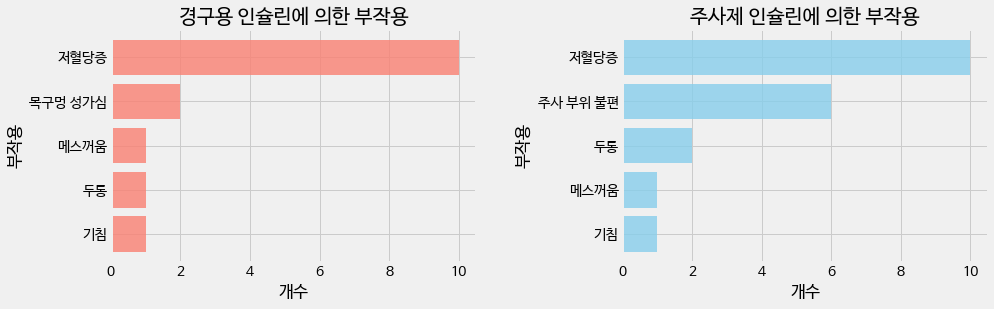

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

df = insuline_test_data.groupby(['인슐린_종류','부작용']).size().reset_index().rename(columns={ 0 : 'count'})

fig, ax = plt.subplots(1,2, figsize=[14,4])

variables = ['경구용 인슐린', '주사제 인슐린']
colors = ['salmon', 'skyblue']

for i in range(len(variables)):
  var = variables[i]
  data = df[df.인슐린_종류 == var].sort_values('count')
  ax[i].barh(data['부작용'], data['count'], color = colors[i], alpha=0.8)
  ax[i].set_ylabel('부작용')
  ax[i].set_xlabel('개수')
  ax[i].set_title('{}에 의한 부작용'.format(var))

plt.subplots_adjust(wspace = 0.4) 
plt.show()

> **🔎 해설**  
- 경구제와 주사제 모두, **저혈당증이 가장 큰 부작용**으로 드러났습니다.
- 하지만 **경구제의 경우, 다른 부작용이 주사제에 비하여 현저하게 적은 것을 확인**할 수 있습니다.
  - 경구제의 특성상 목의 자극에 오는 증상이 두번째로 큰 부작용으로 드러났습니다.
  - 반면, 주사제는 주사한 부위에 불편함을 호소하는 증상이 두번째로 가장 많은 부작용입니다.  
  <br>  
- **부작용 검증 단계에서는 경구제가 주사제에 비해, *'나쁘지 않다 '* 고 보여집니다.**
- 하지만 부작용만 바라보고 치료제를 전환할 수는 없으니, 추가적인 분석이 더 필요합니다.

### **4-2. 인슐린 복용량 변화 검증**
- 추가적인 검증 단계로, **임상시험 전후로의 인슐린 복용량 변화를 비교**해보도록 합시다.  
24주 동안 `기존의 치료제, 주사제를 처방받은`***`대조군`*** 과  
24주 동안 `새로운 치료제, 경구제를 복용한`***`실험군`*** 의 인슐린 복용량 변화를 확인하는 것입니다.

- 인슐린 복용량 변화는,  
`insuline_test`의 `'시작_복용량' - '마지막_복용량'` 값을 통해 확인할 수 있습니다.

In [ ]:
# 인슐린 투여량 변화 확인
insuline_test_data['투여량_변화'] =  insuline_test_data['시작_투여량'] - insuline_test_data['마지막_투여량']

In [ ]:
# groupby()를 통해, 'dose_change'의 mean()값 확인
df = insuline_test_data.groupby('인슐린_종류')['투여량_변화'].mean().reset_index()
df

,인슐린_종류,투여량_변화
0,경구용 인슐린,-8.533333
1,주사제 인슐린,0.800000


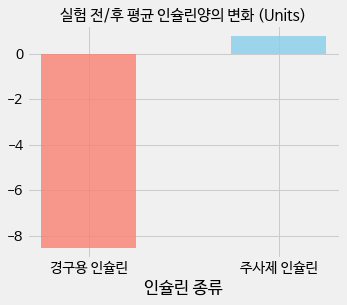

In [ ]:
# 직관적인 확인을 위해, 시각화 진행
plt.figure(figsize=(5, 4))

plt.bar(df['인슐린_종류'], df['투여량_변화'], width=0.5, align='center', alpha=0.8, color = ['salmon', 'skyblue'])
plt.title('실험 전/후 평균 인슐린양의 변화 (Units)', size=15)
plt.xlabel('인슐린 종류');

> **🔎 해설**  
- 인슐린 복용량은 임상시험 시작시기와 비교해 적으면 적을수록 좋을 것입니다.
- 시각화 그래프를 보면 주사 인슐린제의 복용량은 소폭 증가했으나,<br>**눈에 띄게 경구 인슐린제의 복용량이 감소**했음을 확인할 수 있습니다!  
<br>  
- **인슐린 복용량 변화 검증단계에서도 경구제가 주사제에 비해 *'나쁘지 않다 '* 고, 심지어는 좋게까지 보여집니다.**

### **4-3. 혈당 수치 변화 검증**
이제 마지막으로 가장 중요한 **치료제에 따른 혈당 수치를 확인**하도록 하겠습니다.  
이는 이번 데이터의 key metric 인 **`혈당수치_변화`** feature를 확인하면 됩니다.



In [ ]:
# groupby()를 통해, '혈당수치_변화'의 mean()값 확인
df = insuline_test_data.groupby('인슐린_종류')['혈당수치_변화'].mean().reset_index()
df

,인슐린_종류,혈당수치_변화
0,경구용 인슐린,0.379333
1,주사제 인슐린,0.412500


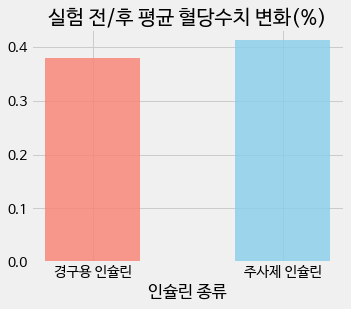

In [ ]:
# 직관적인 확인을 위해, 시각화 진행
plt.figure(figsize=(5, 4))
plt.bar(df['인슐린_종류'], df['혈당수치_변화'], width=0.5, align='center', alpha=0.8, color = ['salmon', 'skyblue'])
plt.title('실험 전/후 평균 혈당수치 변화(%)')
plt.xlabel('인슐린 종류');

> **🔎 해설**  
- `혈당수치_변화` 값은 `'시작_복용량' - '마지막_복용량'`으로 기록되어 있습니다.  
따라서 **`혈당수치_변화`가 작다면 혈당 수치 변화가 적다**는 의미입니다.  
이는 다시 말해, **`혈당수치_변화`가 클수록 약물을 통한 혈당 조절 반응이 크다**는 것이므로 **더 효과적인 약물**임을 의미합니다!  
- 그래프를 확인해 보니, **주사제가 경구제에 비해 큰 혈당 변화를 기록**하고 있습니다.  
해당 그래프 상으로는, 주사제가 더욱 효과적인 투약법이라는 의미일 것입니다.   
<br>   
- 하지만 이 결과가 곧 *'주사제를 유지해야 한다 '*는 결론으로 곧장 이어질 순 없습니다!  
그렇다면 우리는 어떻게 해야 경구 인슐린제의 효능을 입증할 수 있을까요?

In [ ]:
insuline_test_clean.head()

,환자고유번호,인슐린_종류,시작_투여량,마지막_투여량,혈당수치_시작,혈당수치_끝,혈당수치_변화,부작용
0,43,주사제 인슐린,40,45,7.56,7.09,0.47,저혈당증
1,121,주사제 인슐린,42,44,7.56,7.18,0.38,저혈당증
2,496,경구용 인슐린,29,36,7.70,7.19,0.51,저혈당증
3,88,경구용 인슐린,42,51,7.79,7.40,0.39,목구멍 성가심
4,117,주사제 인슐린,32,27,7.52,7.01,0.51,저혈당증


In [ ]:
insuline_test.shape

(350, 6)

### **4-4. 신뢰구간 검증**

우리는 **경구 인슐린제가 주사제에 비해 *'나쁘지 않다 '* 는 것을 입증**하면 됩니다!  
Part 0-3.에서 언급한 `비열등성 검정(non-inferiority test)`을 위해, 약물에 따른 효과 차이를 신뢰구간을 통해 검정하고자 합니다.  

<br>

경구제 **상한선 - 주사제 상한선의 차이**가 0.4% 이하라면, 혈당 조절 측면에서 성공적이라고 여겨집니다.


아래의 그림과 같이 `경구제와 주사제의 차이(Treatment difference)`를 구해,  
이 **차이가 특정 수준 이하라면 비열등성 검정이 성공했다고 확인**합니다.  

인슐린제 임상실험에서는, 통상적으로 **혈당수치 변화가 `0.4%`정도 낮아졌다면, 혈당 조절 측면에서 치료제가 성공적**이라고 여겨집니다.  
따라서 `△=0.4%`로 두고, Treatment difference를 통해 비열등성 검정을 확인해 봅시다.

<br>

<img width='730' src='https://i.imgur.com/OKW40Go.jpg'>  


In [ ]:
# 통계검정 시행을 위해 부트스트랩 샘플링(Bootstrap sampling) 시행

# 주사제(novodra) 데이터 샘플링을 위한 빈 리스트 형성
boot_means = []

# 200개의 데이터를 복원추출하여, 표본의 평균값을 저장

for _ in range(1000):
  bootsample = insuline_test_clean.sample(200, replace=True) # replac=True 를 통하여 복원추출 시행
  boot_means.append(bootsample[bootsample['인슐린_종류'] == '주사제 인슐린']['혈당수치_변화'].mean())

In [ ]:
# 95% 신뢰구간의 주사제 데이터 저장
lower_inj, upper_inj =  np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)
lower_inj, upper_inj 

(0.4023635077186964, 0.4221516450958988)

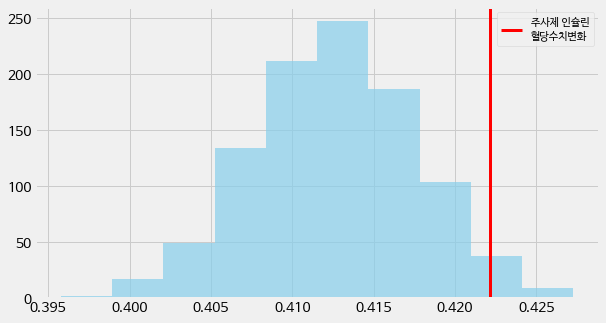

In [ ]:
fig = plt.figure(figsize=(9, 5))
plt.hist(boot_means, color='skyblue', alpha=0.7)
plt.axvline(x=upper_inj, color = 'red', linewidth=3, label='주사제 인슐린\n혈당수치변화')
plt.legend(fontsize=10.5); 

In [ ]:
# 경구제(auralin) 데이터 샘플링을 위한 빈 리스트 형성
boot_means = []

# 200개의 데이터를 복원추출하여, 표본의 평균값을 저장
for _ in range(1000):
  bootsample = insuline_test_clean.sample(200, replace=True)
  boot_means.append(bootsample[bootsample['인슐린_종류'] == '경구용 인슐린']['혈당수치_변화'].mean())

In [ ]:
# 95% 신뢰구간의 경구제 데이터 저장
lower_aural, upper_aural = np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)
lower_aural, upper_aural

(0.365386267875383, 0.39269318181818175)

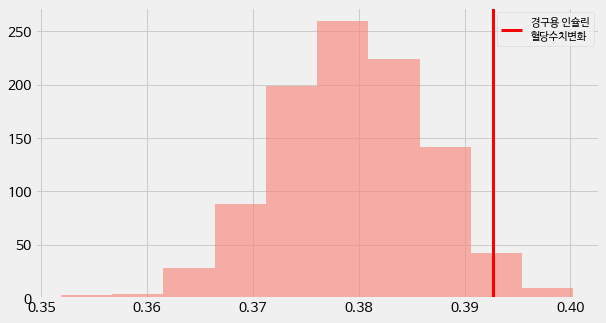

In [ ]:
fig = plt.figure(figsize=(9, 5))
plt.hist(boot_means, color='salmon', alpha=0.6)
plt.axvline(x=upper_aural, color = 'red', linewidth=3, label='경구용 인슐린\n혈당수치변화')
plt.legend(fontsize=10.5); 

In [ ]:
diffs = []
for _ in range(10000):
    sample = insuline_test_clean.sample(200, replace=True)
    sample_experiment_mean = sample.query('인슐린_종류 =="경구용 인슐린"')['혈당수치_변화'].mean()
    sample_control_mean = sample.query('인슐린_종류 =="주사제 인슐린"')['혈당수치_변화'].mean()
    diffs.append(sample_control_mean - sample_experiment_mean)

In [ ]:
# Treatment difference 확인
diff_value = upper_inj - upper_aural
diff_value # 0.4% 미만이면, 비열등성 검정 성공

0.029279801912075243

> **🔎 해설**  
- 최종적으로 `Treatment difference`를 확인했을 때, **`0.4%`**보다 작은 값을 확인할 수 있었습니다.  
- 따라서 **경구제가 주사제에 비해 *'나쁘지 않다 '*** 는 것을 확인했으므로, 해당 임상시험을 통해 **경구제의 효능을 입증한 셈**입니다!

---

<br>

마지막 결론을 내리기 이전에, 이번 **프로젝트의 목표를 다시 생각**해 봅시다!  
우리는 지금까지 **데이터를 정리하고 통합하는 과정인 `Data Wrangling` 과정**을 체계적으로 다뤄 보았습니다.

<br>

그렇다면 지금까지 Data Wrangling 을 진행해 온 이유는 무엇이었나요?  
바로, **`경구복용 인슐린제(oral insulin)의 효능을 확인`하고, 환자 삶의 질적 개선을 위함** 이었습니다!  

이를 위해 Part 4. 에서는 경구 인슐린제의 효능을 다양한 방법을 통해 검증해 보았습니다.  
결론적으로 우리는 **경구제가 주사제에 비해 *'나쁘지 않다 '*** 는 것을 확인할 수 있었습니다.

<br>

경구 인슐린제가 환자들에게 제공된다면, 주사제에 비해 환자의 사회 경제적인 부담을 덜어줄 수 있을 것으로 기대됩니다!  
